<a href="https://colab.research.google.com/github/logeshpalanivel/Cricket_Run_Prediction_Using_Linear_Regression/blob/main/Cricket_Run_Prediction_Using_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/cricket.csv')

In [3]:
df.head()

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
0,1,33,78.0,56,5,0,58.92,3,caught,2
1,1,33,77.0,49,6,0,67.34,3,caught,4
2,1,215,503.0,346,25,1,62.13,3,lbw,1
3,1,58,67.0,48,9,0,120.83,3,bowled,3
4,1,7,26.0,18,1,0,38.88,3,caught,1


In [4]:
df.tail()

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns
291,6,0,2.0,4,0,0,0.00,1,bowled,4
292,6,52,NaN,53,6,1,98.11,1,bowled,1
293,6,41,NaN,62,6,0,66.12,1,caught,3
294,6,4,NaN,3,1,0,133.33,1,caught,2
295,6,2,NaN,7,0,0,28.57,1,lbw,4


In [5]:
df.shape

(296, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Batsman    296 non-null    int64  
 1   Runs       296 non-null    int64  
 2   Mins       292 non-null    float64
 3   BF         296 non-null    int64  
 4   4s         296 non-null    int64  
 5   6s         296 non-null    int64  
 6   SR         296 non-null    float64
 7   Pos        296 non-null    int64  
 8   Dismissal  296 non-null    object 
 9   Inns       296 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 23.2+ KB


In [7]:
df.describe()

,Batsman,Runs,Mins,BF,4s,6s,SR,Pos,Inns
count,296.000000,296.000000,292.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,3.158784,52.243243,122.986301,84.067568,5.986486,0.199324,61.046926,3.033784,2.317568
std,1.559593,53.367497,120.471838,80.850619,6.220781,0.518276,31.803404,1.110294,1.080095
min,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,11.000000,34.000000,22.750000,1.000000,0.000000,42.100000,2.000000,1.000000
50%,3.000000,38.500000,87.000000,59.500000,5.000000,0.000000,56.775000,3.000000,2.000000
75%,4.000000,75.250000,159.500000,116.750000,8.000000,0.000000,73.290000,4.000000,3.000000
max,6.000000,254.000000,614.000000,406.000000,30.000000,3.000000,203.700000,5.000000,4.000000


In [8]:
df.isnull().sum()

Batsman      0
Runs         0
Mins         4
BF           0
4s           0
6s           0
SR           0
Pos          0
Dismissal    0
Inns         0
dtype: int64

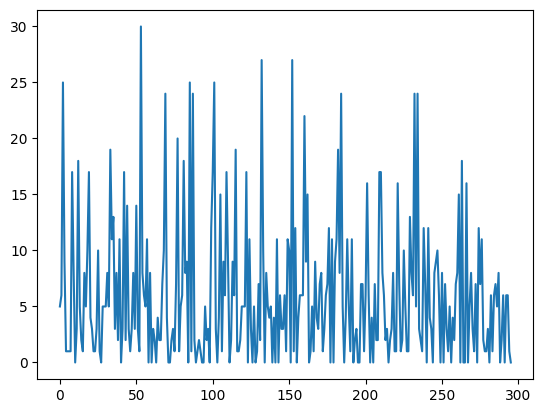

In [18]:
a=df['4s']
plt.plot(a)

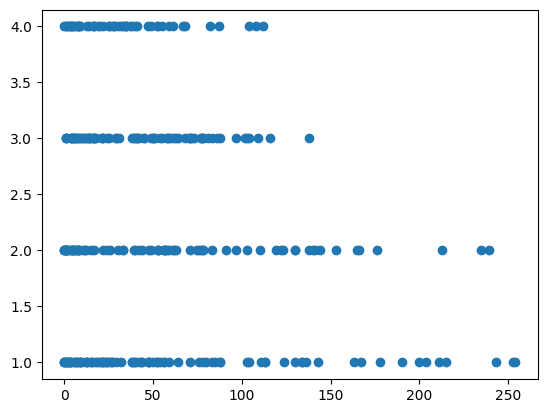

In [14]:
b=df['Runs']
c=df['Inns']
plt.scatter(b,c)

<BarContainer object of 296 artists>

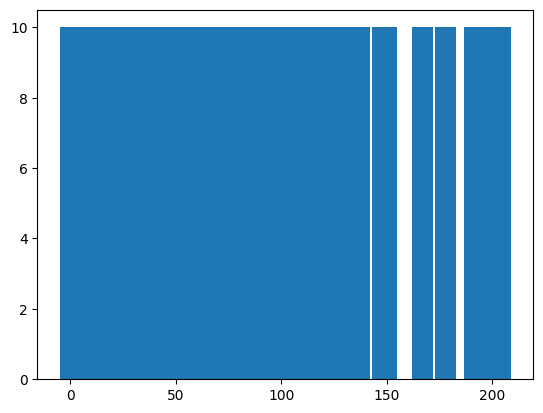

In [16]:
d=df['SR']
plt.bar(d,width=10,height=10)

(array([122.,  55.,  47.,  23.,  19.,  12.,   6.,   3.,   4.,   5.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <BarContainer object of 10 artists>)

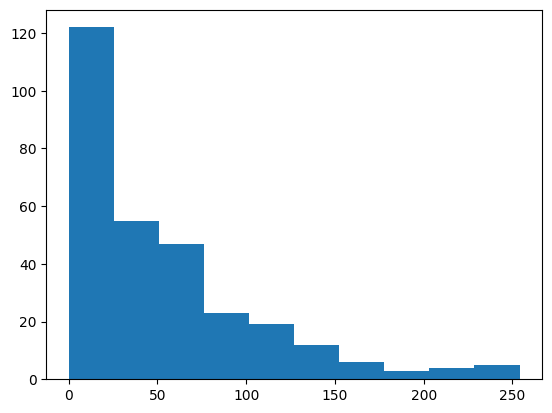

In [17]:
e=df['Runs']
plt.hist(e)

In [22]:
X = df[['4s','6s','SR']]
Y = df['Runs']


In [23]:
X

,4s,6s,SR
0,5,0,58.92
1,6,0,67.34
2,25,1,62.13
3,9,0,120.83
4,1,0,38.88
...,...,...,...
291,0,0,0.00
292,6,1,98.11
293,6,0,66.12
294,1,0,133.33


In [24]:
Y

0       33
1       33
2      215
3       58
4        7
      ... 
291      0
292     52
293     41
294      4
295      2
Name: Runs, Length: 296, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [26]:
x_train.shape

(222, 3)

In [27]:
x_test.shape

(74, 3)

In [28]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()

In [29]:
x_train=c.fit_transform(x_train)

In [30]:
x_train

array([[-4.11654510e-02, -3.98268698e-01, -2.98414159e-01],
       [-1.00313704e+00, -3.98268698e-01, -1.98066508e+00],
       [-2.01494049e-01,  5.01493442e+00, -3.69651669e-01],
       [-3.61822648e-01, -3.98268698e-01, -2.88610832e-01],
       [-8.42808444e-01, -3.98268698e-01, -6.73554808e-01],
       [-4.11654510e-02, -3.98268698e-01, -2.85016279e-01],
       [ 6.00148943e-01, -3.98268698e-01,  4.64611464e-01],
       [ 1.19163148e-01, -3.98268698e-01,  2.81616025e-01],
       [-1.00313704e+00, -3.98268698e-01, -1.16372116e+00],
       [-8.42808444e-01, -3.98268698e-01,  9.60333036e-01],
       [ 7.60477542e-01, -3.98268698e-01, -4.05866572e-02],
       [-1.00313704e+00, -3.98268698e-01, -1.98066508e+00],
       [ 1.24146334e+00, -3.98268698e-01,  1.15939798e-01],
       [-8.42808444e-01, -3.98268698e-01, -7.55249200e-01],
       [ 2.79491746e-01, -3.98268698e-01, -3.36320357e-01],
       [ 1.72244913e+00, -3.98268698e-01,  6.05125818e-01],
       [ 2.84474932e+00,  3.21053338e+00

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [35]:
y_pred

array([ 2.96173764e+02, -1.51984558e+02,  6.42625888e+02, -2.23534754e+02,
       -2.92723878e+01, -2.71317884e+02,  3.54997844e+02,  1.99345062e+02,
       -5.45540227e+02, -5.02875568e+01, -6.52923875e+01, -2.64819686e+01,
       -2.79934104e+02, -1.53749832e+02, -8.00706496e+01, -2.68694382e+01,
       -3.99501219e+02,  1.16907152e+02, -6.92104055e+01, -5.02875568e+01,
       -1.05288852e+02,  5.03803470e+01,  8.34345858e+01,  4.06146789e+02,
       -1.87483864e+01, -1.50541086e+02,  6.93272445e+02,  2.61246553e+02,
        1.46985662e+01, -1.98747804e+00,  6.82542005e+02,  1.80005698e+01,
        4.02201779e+01,  1.60971363e+02, -1.10188129e+02, -5.00392423e+02,
       -1.96310235e+01, -5.13975340e+00,  9.50823184e+02, -1.47319190e+02,
       -2.96342439e+01, -2.13007310e-01, -2.19905584e+02,  1.56508807e+02,
       -1.28615690e+02, -3.71832879e+01,  1.58754156e+01, -2.99048190e+01,
       -1.06860392e+02, -2.23335655e+02,  2.07994115e+02,  5.47882883e+01,
       -1.35298514e+02, -

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
mae = mean_absolute_error(y_test,y_pred)
mae

172.5794778194923

In [39]:
mse = mean_squared_error(y_test,y_pred)
mse

63932.884449061574

In [40]:
r = r2_score(y_test,y_pred)
r

-25.39914225247208